In [1]:
import numpy as np
import pandas as pd
import MeCab
import re
import networkx as nx
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')



In [2]:
df = pd.read_excel('data/비교.xlsx')
df.shape

(2409, 16)

In [3]:
df.head(1)

,site,hotel,score,review,date,star,length,review_spell_check,helpful,attitude,위치,시설,인테리어,청결,친절,방음
0,아고다,나인트리 프리미어 명동2,10.0,뷰 좋고 위치 좋고 깨끗하고 최고 입니다,NaN,NaN,22,뷰 좋고 위치 좋고 깨끗하고 최고입니다,1,2,1,0,0,0,0,0


In [4]:
stop_words = ['나','여기','무엇','그것','가','긋','가본','제','저','저희','그거','브','우리','그','큐티','쏘','슈','어디','뭐','자기','놀자','이곳','임','요방','너','그곳','거기','니티','노','이쪽','저기','호텔','곳','점','앞','시','원분','스로','도','대','플','기','그제','넥','딩','놀','좋','있','이','하','되','많','같','보','없','오','층','때','묵','쉬','먹','크','들','그렇','아니','1','2','호','일','감사']
len(stop_words)

70

In [5]:
def getNVM_lemma(text):
    tokenizer = MeCab.Tagger()
    parsed = tokenizer.parse(text)
    #print(parsed)
    word_tag = [w for w in parsed.split("\n")] 
    pos = []
    tags = ["NNG", "NNP","VV","VA","VCP",'VCN','XR']
   
    for word_ in word_tag[:-2]:
        word = word_.split('\t') #['아버지', 'NNG,*,F,아버지,*,*,*,*']
        tag = word[1].split(",")  #['EC', '*', 'F', '는다', '*', '*', '*', '*']
        if('+' in tag[0]): #단어가 여러 형태소로 구성된 경우
            if ('VV' in tag[0] or 'VA' in tag[0] or 'VX' in tag[0]):
                t = tag[-1].split('/')[0]
                if t not in stop_words:
                    pos.append(t)
        elif ((tag[0] in tags) and (word[0] not in stop_words)):
            pos.append(word[0])
    return pos

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tf = CountVectorizer(tokenizer=getNVM_lemma, preprocessor=None, lowercase=False)
tdm = tf.fit_transform(df['review_spell_check'])

In [7]:
words = tf.get_feature_names()
words

['가게',
 '가격',
 '가격대',
 '가구',
 '가까워',
 '가까이',
 '가깝',
 '가능',
 '가도',
 '가동',
 '가득',
 '가랑',
 '가량',
 '가리',
 '가방',
 '가볍',
 '가성',
 '가습기',
 '가시',
 '가요',
 '가운',
 '가운데',
 '가을',
 '가져가',
 '가져다주',
 '가져오',
 '가족',
 '가족호텔',
 '가존',
 '가죽',
 '가지',
 '가짓수',
 '가치',
 '가하',
 '각자',
 '각종',
 '간',
 '간격',
 '간결',
 '간단',
 '간식',
 '간이침대',
 '간접',
 '간택',
 '갈',
 '갈고',
 '갈구',
 '갈아주',
 '감',
 '감기',
 '감내',
 '감동',
 '감안',
 '감지',
 '감탄',
 '갑',
 '갑갑',
 '갑인',
 '값',
 '강',
 '강남',
 '강력',
 '강변역',
 '강북',
 '강제',
 '강추',
 '갖',
 '갖추',
 '개',
 '개방',
 '개별',
 '개별난방',
 '개선',
 '개성',
 '개수',
 '개울',
 '개인',
 '개장',
 '객',
 '객석',
 '객실',
 '거',
 '거리',
 '거미',
 '거슬리',
 '거울',
 '거주',
 '거짓말',
 '거칠',
 '걱정',
 '건',
 '건너',
 '건너편',
 '건물',
 '건조',
 '걷',
 '걸',
 '걸리',
 '걸맞',
 '걸어가',
 '검',
 '검사',
 '검색',
 '겁나',
 '겉모습',
 '겉보기',
 '게',
 '게스트',
 '겨울',
 '겨울날',
 '격',
 '격하',
 '겪',
 '결국',
 '결정',
 '결제',
 '결혼식',
 '경',
 '경복궁',
 '경우',
 '경치',
 '경향',
 '경험',
 '경호원',
 '계단',
 '계속',
 '계시',
 '계열',
 '계획',
 '고',
 '고객',
 '고급',
 '고도',
 '고려',
 '고르',
 '고리',
 '고맙',
 '고무',
 '고민',
 '고생',
 '고요',
 '고

In [8]:
위치_idx = words.index('위치')
청결_idx = words.index('청결')
깨끗_idx = words.index('깨끗')
친절_idx = words.index('친절')
시설_idx = words.index('시설')

In [9]:
tdm_arr = tdm.toarray()
tdm_len = []
for i in range(len(tdm_arr)):
    a = tdm_arr[i]
    a = np.append(a, df['위치'][i]) #-6
    a = np.append(a, df['시설'][i]) #-5
    a = np.append(a, df['인테리어'][i]) #-4
    a = np.append(a, df['청결'][i]) #-3
    a = np.append(a, df['친절'][i]) #-2
    a = np.append(a, df['방음'][i]) #-1
    tdm_len.append(a)

In [10]:
len(tdm_len[0])

2537

In [11]:
tdm_len[0]

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
tdm_len[0][-6]

1

In [12]:
def make_list(keyword,idx,list_name):
    for r in range(len(tdm_len)):
    #print(r)
        if tdm_len[r][idx] > 0:
            
            for x in range(len(tdm_arr[0])):
                #print(words[x])
                if (tdm_arr[r][x] > 0) and (words[x] != keyword):
                    list_name.append(words[x])

In [13]:
위치_list = []
청결_list = []
친절_list = []
시설_list = []
인테리어_list = []
방음_list = []

make_list('위치',-6,위치_list)
make_list('시설',-5,시설_list)
make_list('인테리어',-4,인테리어_list)
make_list('청결',-3,청결_list)
make_list('친절',-2,친절_list)
make_list('방음',-1,방음_list)


In [334]:
c = Counter(친절_list)
print(c.most_common(100))

[('직원', 229), ('깨끗', 78), ('위치', 77), ('이용', 61), ('깔끔', 60), ('객실', 55), ('룸', 55), ('방', 55), ('만족', 50), ('시설', 49), ('다음', 45), ('서비스', 44), ('조식', 44), ('청결', 41), ('편하', 37), ('숙소', 36), ('프런트', 36), ('방문', 36), ('뷰', 34), ('아쉽', 34), ('가격', 30), ('주변', 29), ('컨디션', 28), ('편의점', 28), ('생각', 27), ('남산', 26), ('정도', 24), ('불편', 24), ('말', 24), ('보이', 24), ('가깝', 23), ('괜찮', 22), ('예약', 22), ('청소', 22), ('응대', 22), ('접근성', 22), ('넓', 21), ('편리', 21), ('상태', 20), ('주', 20), ('라운지', 19), ('요청', 19), ('체크인', 19), ('맛있', 18), ('명동', 17), ('받', 17), ('드리', 17), ('최고', 16), ('신라', 16), ('시간', 15), ('욕조', 15), ('맛', 15), ('근처', 15), ('서울', 15), ('의사', 15), ('코로나', 15), ('부분', 15), ('로비', 15), ('광화문', 15), ('좁', 14), ('편의', 14), ('체크', 14), ('쓰', 13), ('체크아웃', 13), ('대비', 13), ('조용', 13), ('먼지', 13), ('추천', 13), ('주차장', 13), ('전화', 13), ('어메니티', 13), ('기분', 13), ('작', 13), ('집', 12), ('업그레이드', 12), ('화장실', 12), ('침대', 12), ('사항', 12), ('모르', 12), ('방음', 12), ('숙박', 12), ('교통', 12), ('주차', 1

In [14]:
방음포함리스트 = ['조용','방','위치','들리','소리','옆방','소음','시끄럽','잠','밤','새벽','주변','아침','조계사']
방음_list2 = []
for w in 방음_list:
    if w in 방음포함리스트:
        방음_list2.append(w)
        
위치포함리스트 = ['가깝','주변','접근성','광화문','방','명동','가격','객실','편의점','뷰','근처','방문','교통','맛','집','걷','서울','을지로','거리','여행','주차장','남산','지하철','종로','역','인사동','이동','도보','지하철역','식당','경복궁','커피']
위치_list2 = []
for w in 위치_list:
    if w in 위치포함리스트:
        위치_list2.append(w)
인테리어포함리스트 = ['방','넓','좁','깔끔','작','크기','느낌','욕조','욕실','답답','내부','테이블','모던','사이즈']
인테리어_list2 = []
for w in 인테리어_list:
    if w in 인테리어포함리스트:
        인테리어_list2.append(w)
        
친절포함리스트 = ['직원','룸','객실','응대','말','요청','코로나','체크아웃','전화','기분','안내','방','조식','프런트','서비스','컨디션','예약','체크인','업그레이드','불편']
친절_list2 = []
for w in 친절_list:
    if w in 친절포함리스트:
        친절_list2.append(w)
청결포함리스트 = ['객실','상태','시설','침대','방','깨끗','깔끔','먼지','침구','화장실','어메니티','수건','침구류','신경','청소','욕조','컨디션','쾌적','머리카락','위생','냄새','물']
청결_list2 = []
for w in 청결_list:
    if w in 청결포함리스트:
        청결_list2.append(w)
시설포함리스트 = ['위치','라운지','주차','로비','편의점','헬스','조식','객실','넓','건물','엘리베이터','루프','공간','수영장']
시설_list2 = []
for w in 시설_list:
    if w in 시설포함리스트:
        시설_list2.append(w)

In [15]:
relations = []
#degrees = []
for x in 위치_list2:
    if x =='걷':
        relations.append(("위치",'걷다'))
    else:
        relations.append(("위치",x))
    #degrees.append(v)
for x in 청결_list2:
    relations.append(("청결",x))
for x in 시설_list2:
    if x=='넓':
        relations.append(("시설",'넓다'))
    else:
        relations.append(("시설",x))
for x in 친절_list2:
    relations.append(("친절",x))
for x in 인테리어_list2:
    if x == '좁':
        relations.append(("인테리어",'좁다'))
    elif x =='작':
        relations.append(("인테리어",'작다'))
    elif x == '넓':
        relations.append(("인테리어",'넓다'))
    else:
        relations.append(("인테리어",x))
for x in 방음_list2:
    relations.append(("방음",x))

In [16]:
from collections import Counter
c=Counter(relations)

포함리스트 = []
degree = {}
for k,v in c.items():
        
        포함리스트.append(k)
        degree[k[1]] = v

In [17]:
degree

{'뷰': 49,
 '근처': 44,
 '주변': 9,
 '을지로': 30,
 '편의점': 82,
 '가격': 52,
 '주차장': 25,
 '지하철': 22,
 '객실': 55,
 '교통': 32,
 '커피': 14,
 '여행': 26,
 '걷다': 31,
 '맛': 32,
 '지하철역': 15,
 '가깝': 81,
 '명동': 55,
 '종로': 22,
 '방': 25,
 '거리': 27,
 '접근성': 77,
 '남산': 25,
 '도보': 16,
 '역': 22,
 '방문': 40,
 '서울': 31,
 '식당': 15,
 '집': 32,
 '이동': 17,
 '경복궁': 15,
 '인사동': 19,
 '광화문': 60,
 '먼지': 39,
 '상태': 62,
 '청소': 57,
 '침대': 40,
 '깨끗': 290,
 '깔끔': 34,
 '시설': 66,
 '침구': 28,
 '쾌적': 19,
 '수건': 18,
 '욕조': 9,
 '컨디션': 28,
 '화장실': 44,
 '침구류': 17,
 '냄새': 21,
 '신경': 15,
 '위생': 22,
 '머리카락': 20,
 '어메니티': 17,
 '물': 16,
 '위치': 22,
 '수영장': 13,
 '헬스': 14,
 '공간': 18,
 '주차': 53,
 '넓다': 63,
 '로비': 24,
 '건물': 23,
 '루프': 18,
 '라운지': 33,
 '조식': 44,
 '엘리베이터': 20,
 '직원': 229,
 '체크아웃': 13,
 '룸': 55,
 '업그레이드': 12,
 '서비스': 44,
 '요청': 19,
 '예약': 22,
 '안내': 11,
 '프런트': 36,
 '불편': 24,
 '응대': 22,
 '체크인': 19,
 '말': 24,
 '코로나': 15,
 '전화': 13,
 '기분': 13,
 '욕실': 8,
 '좁다': 34,
 '크기': 10,
 '느낌': 10,
 '사이즈': 5,
 '모던': 5,
 '작다': 23,
 '테이블': 6,
 '답답': 6,
 

In [326]:
포함리스트

[('위치', '뷰'),
 ('위치', '근처'),
 ('위치', '주변'),
 ('위치', '을지로'),
 ('위치', '편의점'),
 ('위치', '가격'),
 ('위치', '주차장'),
 ('위치', '지하철'),
 ('위치', '객실'),
 ('위치', '교통'),
 ('위치', '커피'),
 ('위치', '여행'),
 ('위치', '걷다'),
 ('위치', '맛'),
 ('위치', '지하철역'),
 ('위치', '가깝'),
 ('위치', '명동'),
 ('위치', '종로'),
 ('위치', '방'),
 ('위치', '거리'),
 ('위치', '접근성'),
 ('위치', '남산'),
 ('위치', '도보'),
 ('위치', '역'),
 ('위치', '방문'),
 ('위치', '서울'),
 ('위치', '식당'),
 ('위치', '집'),
 ('위치', '이동'),
 ('위치', '경복궁'),
 ('위치', '인사동'),
 ('위치', '광화문'),
 ('청결', '먼지'),
 ('청결', '상태'),
 ('청결', '청소'),
 ('청결', '침대'),
 ('청결', '깨끗'),
 ('청결', '깔끔'),
 ('청결', '시설'),
 ('청결', '침구'),
 ('청결', '쾌적'),
 ('청결', '수건'),
 ('청결', '방'),
 ('청결', '욕조'),
 ('청결', '객실'),
 ('청결', '컨디션'),
 ('청결', '화장실'),
 ('청결', '침구류'),
 ('청결', '냄새'),
 ('청결', '신경'),
 ('청결', '위생'),
 ('청결', '머리카락'),
 ('청결', '어메니티'),
 ('청결', '물'),
 ('시설', '위치'),
 ('시설', '수영장'),
 ('시설', '헬스'),
 ('시설', '편의점'),
 ('시설', '공간'),
 ('시설', '주차'),
 ('시설', '넓다'),
 ('시설', '로비'),
 ('시설', '건물'),
 ('시설', '루프'),
 ('시설', '라운지'),
 ('시설', '조식'

In [328]:
G1.nodes()

NodeView(('위치', '뷰', '근처', '주변', '을지로', '편의점', '가격', '주차장', '지하철', '객실', '교통', '커피', '여행', '걷다', '맛', '지하철역', '가깝', '명동', '종로', '방', '거리', '접근성', '남산', '도보', '역', '방문', '서울', '식당', '집', '이동', '경복궁', '인사동', '광화문', '청결', '먼지', '상태', '청소', '침대', '깨끗', '깔끔', '시설', '침구', '쾌적', '수건', '욕조', '컨디션', '화장실', '침구류', '냄새', '신경', '위생', '머리카락', '어메니티', '물', '수영장', '헬스', '공간', '주차', '넓다', '로비', '건물', '루프', '라운지', '조식', '엘리베이터', '친절', '직원', '체크아웃', '룸', '업그레이드', '서비스', '요청', '예약', '안내', '프런트', '불편', '응대', '체크인', '말', '코로나', '전화', '기분', '인테리어', '욕실', '좁다', '크기', '느낌', '사이즈', '모던', '작다', '테이블', '답답', '내부', '방음', '시끄럽', '들리', '소리', '아침', '잠', '밤', '조용', '옆방', '새벽', '소음', '조계사'))

In [18]:
degree = {'위치':50,'뷰': 49,'근처': 44,'주변': 9,'을지로': 30,'편의점': 82,'가격': 52,'주차장': 25,'지하철': 22,'객실': 55,'교통': 32,'커피': 14,'여행': 26,'걷다': 31,'맛': 32,'지하철역': 15,'가깝': 81,'명동': 55,'종로': 22,'방': 25,'거리': 27,'접근성': 77,'남산': 25,'도보': 16,'역': 22,'방문': 40,'서울': 31,'식당': 15,'집': 32,'이동': 17,'경복궁': 15,'인사동': 19,'광화문': 60,
 '청결':50,'먼지': 39,'상태': 62,'청소': 57,'침대': 40,'깨끗': 290,'깔끔': 34,'시설': 66,'침구': 28,'쾌적': 19,'수건': 18,'욕조': 9,'컨디션': 28,'화장실': 44,'침구류': 17,'냄새': 21,'신경': 15,'위생': 22,'머리카락': 20,'어메니티': 17,'물': 16,'수영장': 13,'헬스': 14,'공간': 18,'주차': 53,'넓다': 63,'로비': 24,'건물': 23,'루프': 18,'라운지': 33,'조식': 44,'엘리베이터': 20,
 '친절':50,'직원': 229,'체크아웃': 13,'룸': 55,'업그레이드': 12,'서비스': 44,'요청': 19,'예약': 22 ,'안내': 11,'프런트': 36,'불편': 24,'응대': 22,'체크인': 19,'말': 24,'코로나': 15,'전화': 13,'기분': 13,
          '인테리어':50,'욕실': 8,'좁다': 34,'크기': 10,'느낌': 10,'사이즈': 5,'모던': 5,'작다': 23,'테이블': 6,'답답': 6,'내부': 8,
    '방음':50,'시끄럽': 16,'들리': 21,'소리': 21,'아침': 7,'잠': 13,'밤': 10,'조용': 28,'옆방': 21,'새벽': 10,'소음': 21,'조계사': 5}

In [178]:
df.head(1)

,site,hotel,score,review,date,star,length,review_spell_check,helpful,attitude,위치,시설,인테리어,청결,친절,방음
0,아고다,나인트리 프리미어 명동2,10.0,뷰 좋고 위치 좋고 깨끗하고 최고 입니다,NaN,NaN,22,뷰 좋고 위치 좋고 깨끗하고 최고입니다,1,2,1,0,0,0,0,0


In [20]:

plt.figure(figsize=(30,15))
plt.axis('off')
G1 = nx.Graph()
G1.add_edges_from(포함리스트, color='blue')

NameError: name 'G1' is not defined

In [24]:
pr

{'위치': 0.13701934793915285,
 '뷰': 0.004854271699353748,
 '근처': 0.004854271699353748,
 '주변': 0.008352305929940032,
 '을지로': 0.004854271699353748,
 '편의점': 0.008116050882456706,
 '가격': 0.004854271699353748,
 '주차장': 0.004854271699353748,
 '지하철': 0.004854271699353748,
 '객실': 0.014875112171357048,
 '교통': 0.004854271699353748,
 '커피': 0.004854271699353748,
 '여행': 0.004854271699353748,
 '걷다': 0.004854271699353748,
 '맛': 0.004854271699353748,
 '지하철역': 0.004854271699353748,
 '가깝': 0.004854271699353748,
 '명동': 0.004854271699353748,
 '종로': 0.004854271699353748,
 '방': 0.018509628148341773,
 '거리': 0.004854271699353748,
 '접근성': 0.004854271699353748,
 '남산': 0.004854271699353748,
 '도보': 0.004854271699353748,
 '역': 0.004854271699353748,
 '방문': 0.004854271699353748,
 '서울': 0.004854271699353748,
 '식당': 0.004854271699353748,
 '집': 0.004854271699353748,
 '이동': 0.004854271699353748,
 '경복궁': 0.004854271699353748,
 '인사동': 0.004854271699353748,
 '광화문': 0.004854271699353748,
 '청결': 0.0860439334923585,
 '먼지': 0.004

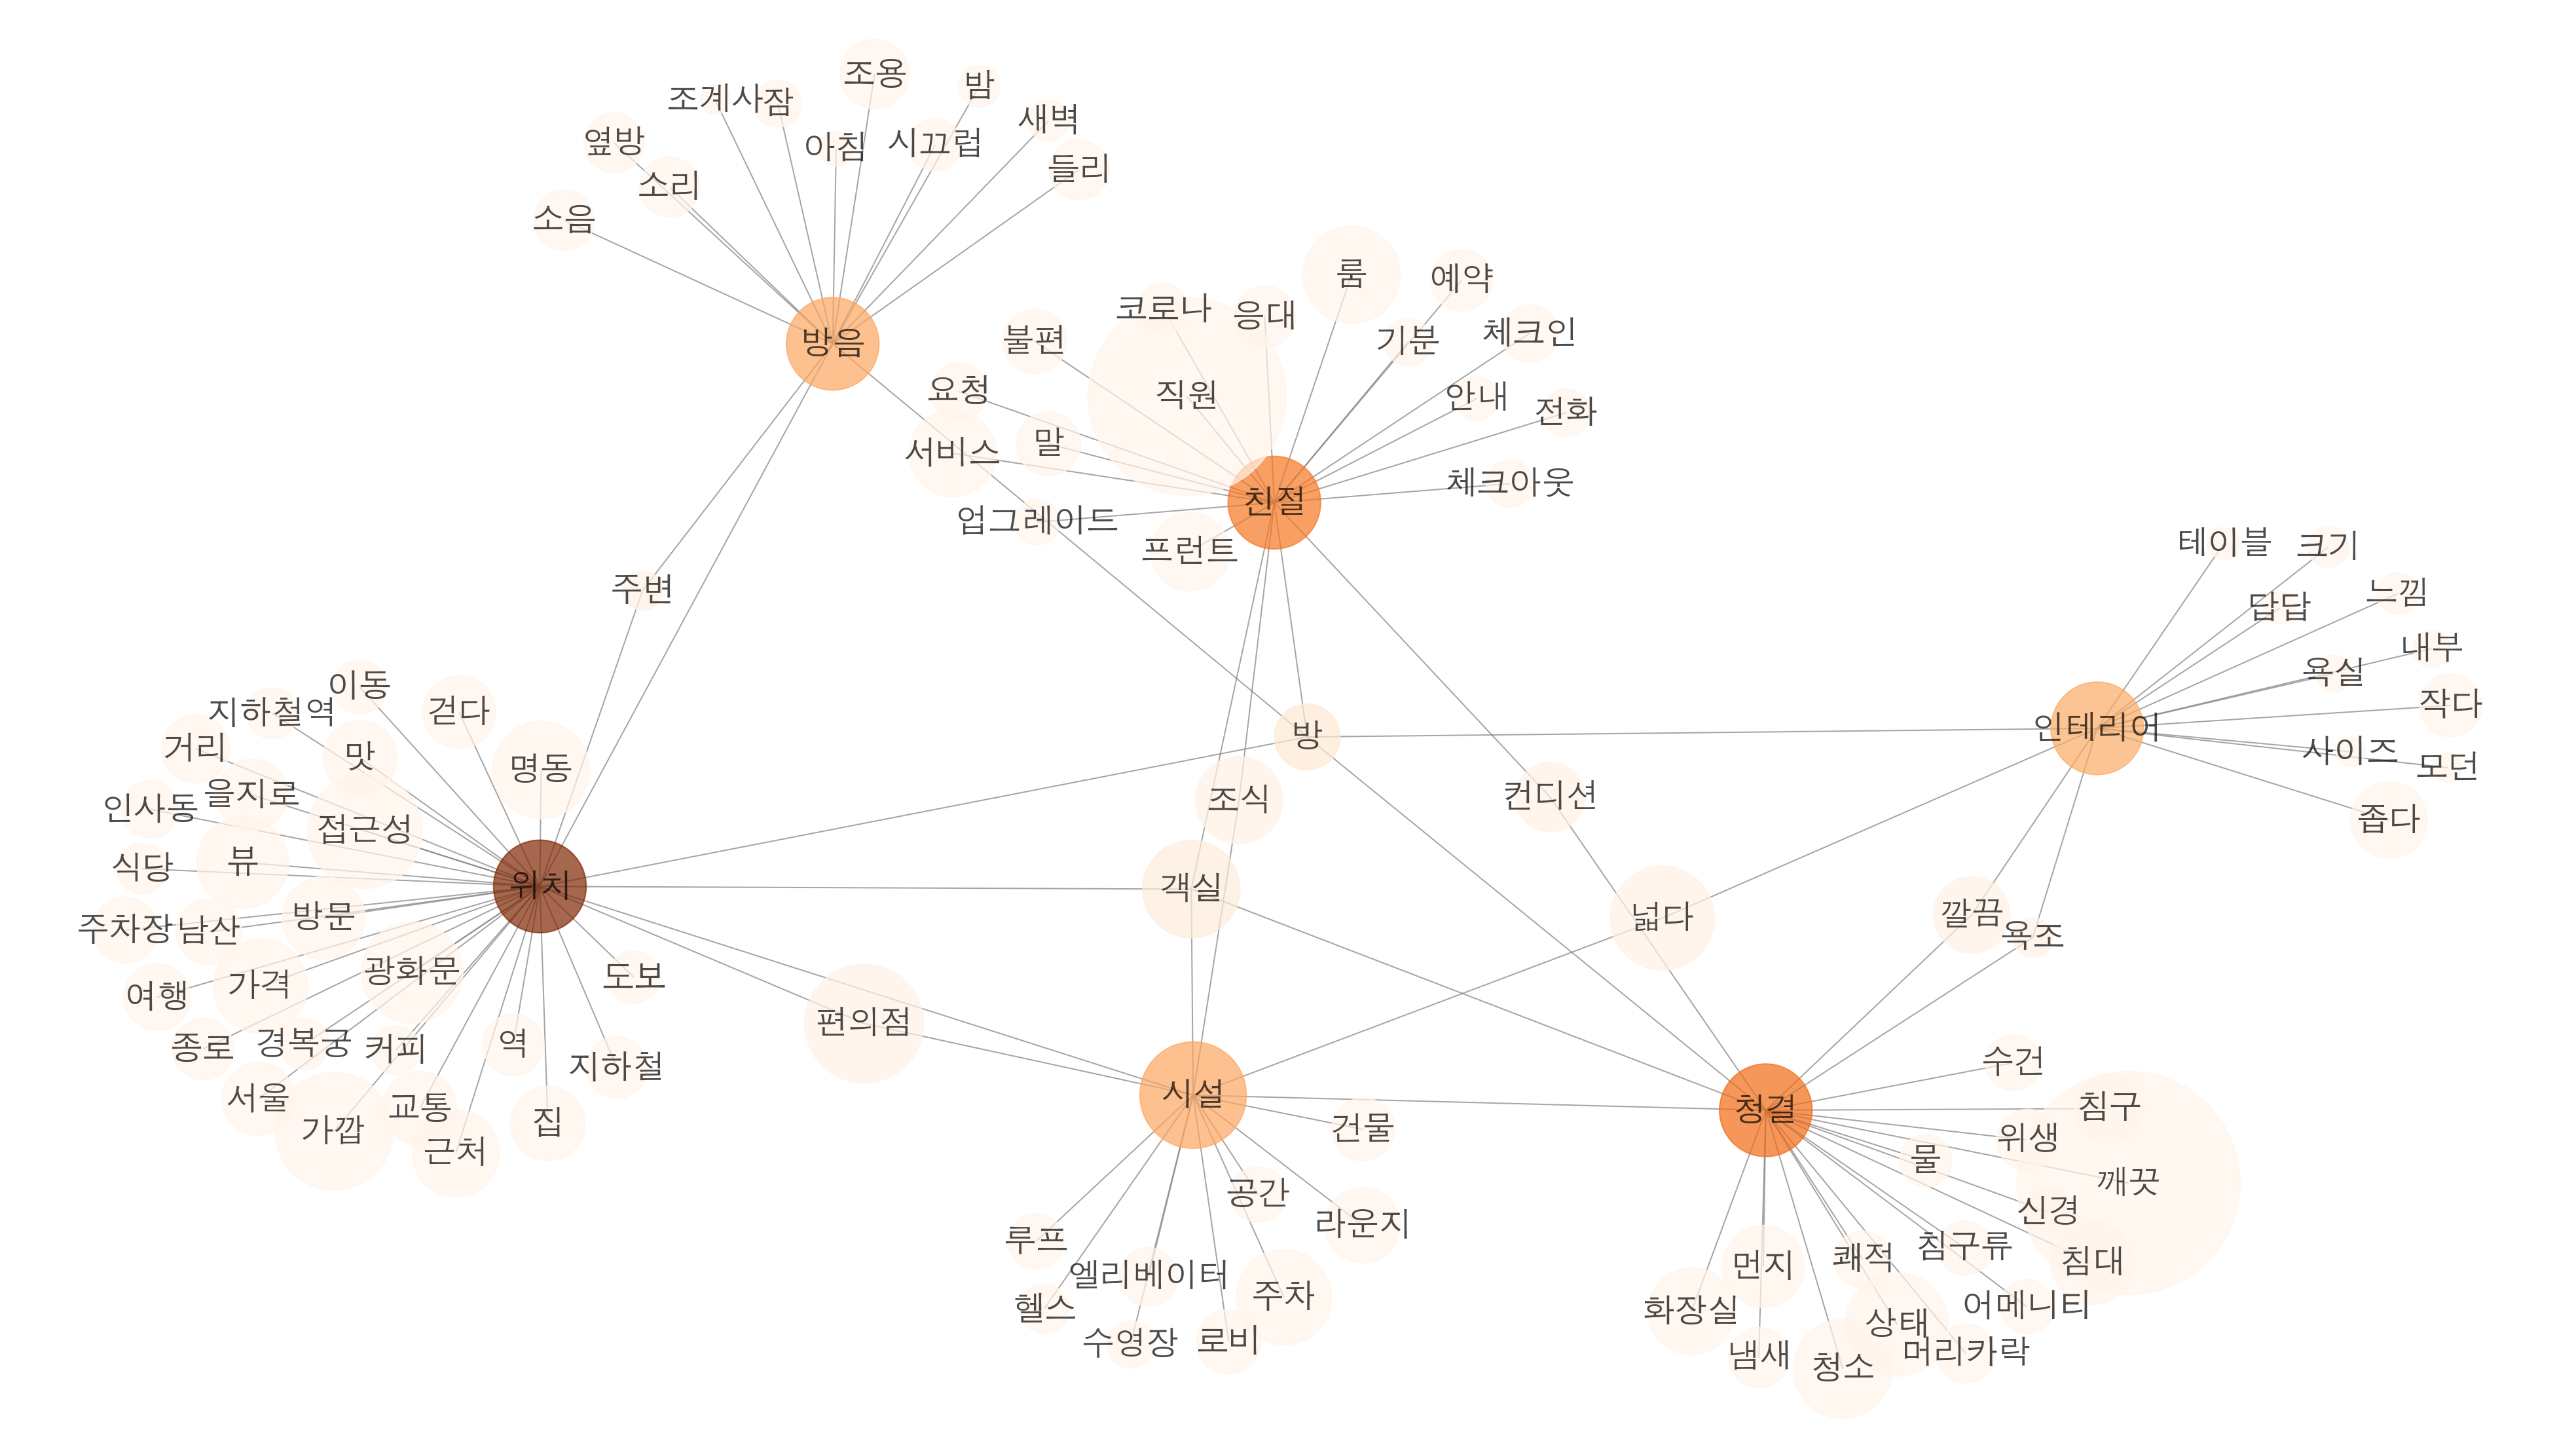

In [28]:
plt.figure(figsize=(35,20))
plt.axis('off')
G1 = nx.Graph()
G1.add_edges_from(포함리스트, color='blue')
pos=nx.random_layout(G1)
pr = nx.pagerank(G1)
#nx.draw_circular(G)
nx.draw_networkx(G1
             ,node_size=[v*100 for k,v in degree.items()]
             ,alpha=0.7
            ,font_family='AppleGothic'
                 ,font_size=25
                ,edge_color='.5'
                 ,font_color='black'
            ,node_color=list(pr.values())
                 ,cmap=plt.cm.Oranges
             )
#nx.draw_networkx_labels(G1, pos, font_family='AppleGothic',font_size=20,edge_color='.5') 
plt.savefig("Graph1.png", format="PNG")
plt.show()


In [28]:
plt.savefig("Graph.png", format="PNG")

<Figure size 432x288 with 0 Axes>

## Export

In [185]:
nx.write_graphml(G1, 'data/그래프.graphml')